# Logistik Regressiya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dataset: https://kaggle.com/uciml/pima-indians-diabetes-database
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df = np.array(df, dtype=float)
df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [5]:
X = df[:, :8]
Y = df[:, 8:]

In [6]:
def feature_scaling(X):
    avg_array = np.mean(X, 0)
    std_array = np.std(X, 0)
    return np.divide(X - avg_array, std_array)

In [7]:
X = feature_scaling(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [8]:
def add_bias(X):
    B = np.ones((X.shape[0], 1))
    return np.hstack((B, X))

X = add_bias(X)

In [9]:
def split(X, Y):
    rows, _ = X.shape
    train_rows = round(rows * 0.8)
    test_rows = rows - train_rows
    return X[:train_rows, :], X[train_rows:, :], Y[:train_rows, :], Y[train_rows:, :]

X_train, X_test, Y_train, Y_test = split(X, Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 9), (154, 9), (614, 1), (154, 1))

In [10]:
A = np.random.rand(X.shape[1], 1)
A

array([[0.12476962],
       [0.73027753],
       [0.18899521],
       [0.90138736],
       [0.74784583],
       [0.70578886],
       [0.83546314],
       [0.28086015],
       [0.35643773]])

In [11]:
def logistic_regression_function(X, A):
    Z = np.dot(X, A)
    return 1 / (1 + np.exp(-Z))

In [12]:
def cost(X, A, Y):
    m = Y.shape[0]
    F_x = logistic_regression_function(X, A)
    cost_ = - np.sum(Y * np.log(F_x) + (1 - Y) * np.log(1 - F_x)) / m
    return cost_

In [13]:
epochs = 500
learning_rate = 0.1

In [14]:
def gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
    train_costs = []
    test_costs = []
    m_train = Y_train.shape[0]
    m_test = Y_test.shape[0]
    for k in range(epochs):
        F_x = logistic_regression_function(X_train, A)
        A = A - learning_rate * np.dot(X_train.T, (F_x - Y_train)) / m_train
        cost_train_ = cost(X_train, A, Y_train)
        cost_test_ = cost(X_test, A, Y_test)
        train_costs.append(cost_train_)
        test_costs.append(cost_test_)
        if k % 20 == 0:
            print(f"epoch: {k}, {cost_train_}")
            print(f"epoch: {k}, {cost_test_}")
    return A, train_costs, test_costs

In [15]:
A, train_costs, test_costs = gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 0.8053614978658502
epoch: 0, 0.8894453962437459
epoch: 20, 0.6567954067038931
epoch: 20, 0.7178732657987662
epoch: 40, 0.5665826946555219
epoch: 40, 0.6127240596097145
epoch: 60, 0.5182603668385266
epoch: 60, 0.5555845040972164
epoch: 80, 0.494731612047111
epoch: 80, 0.5269013344662654
epoch: 100, 0.48345774666727553
epoch: 100, 0.5124515028791758
epoch: 120, 0.47772382443412476
epoch: 120, 0.5046213269135509
epoch: 140, 0.47453367498740534
epoch: 140, 0.4999613868307758
epoch: 160, 0.47260823657321677
epoch: 160, 0.49695755037695033
epoch: 180, 0.47137409896324006
epoch: 180, 0.4949065570841087
epoch: 200, 0.47054980349443953
epoch: 200, 0.49344944684184744
epoch: 220, 0.4699835601079396
epoch: 220, 0.4923846477645005
epoch: 240, 0.46958682866610485
epoch: 240, 0.4915897321591774
epoch: 260, 0.46930482598986767
epoch: 260, 0.490985890818791
epoch: 280, 0.4691021726881642
epoch: 280, 0.4905202468539489
epoch: 300, 0.46895529515933
epoch: 300, 0.4901562573581554
epoch: 320, 0.

In [16]:
def plot_cost(train_costs, test_costs, epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(epochs, train_costs, 'm', linewidth='1', color='r', label='mashqdagi xatolik')
    plt.plot(epochs, test_costs, 'm', linewidth='1', color='g', label='testdagi xatolik')
    plt.legend(loc='upper right')
    plt.show()

C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_8396\1043726054.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_costs, 'm', linewidth='1', color='r', label='mashqdagi xatolik')
C:\Users\JAVOHIR\AppData\Local\Temp\ipykernel_8396\1043726054.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m" (-> color=(0.75, 0.0, 0.75, 1)). The keyword argument will take precedence.
  plt.plot(epochs, test_costs, 'm', linewidth='1', color='g', label='testdagi xatolik')


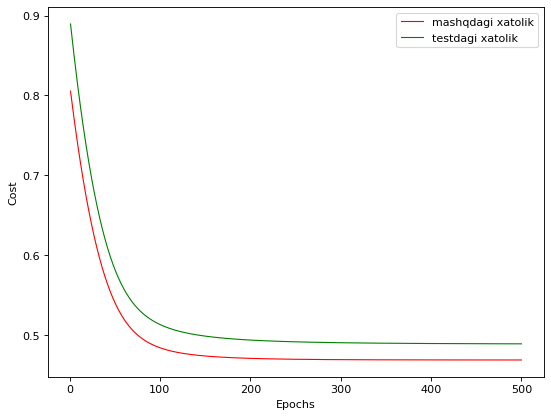

In [18]:
n_epochs = np.arange(1, epochs + 1)

plt.figure(figsize=(8, 6), dpi=80)

plot_cost(train_costs, test_costs, n_epochs)

In [19]:
test_predictions = logistic_regression_function(X_test, A)
test_predictions[:10, :]

array([[0.74911379],
       [0.08784502],
       [0.16845903],
       [0.01464831],
       [0.50035045],
       [0.27511544],
       [0.20974051],
       [0.16804153],
       [0.96500052],
       [0.20601054]])

In [20]:
def db_function(prediction):
    if prediction > 0.5:
        return 1
    else:
        return 0

db_function = np.vectorize(db_function)

In [21]:
test_predictions = db_function(test_predictions)
test_predictions[:10, :]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [22]:
def calculate_helper_vars(predicted, actual):
    n = actual.shape[0]
    predicted = predicted.reshape(-1, actual.shape[1])
    tp = np.count_nonzero((predicted==actual) & (predicted==1))
    tn = np.count_nonzero((predicted==actual) & (predicted==0))
    fp = np.count_nonzero((predicted!=actual) & (predicted==1))
    fn = np.count_nonzero((predicted!=actual) & (predicted==0))
    return tp, tn, fp, fn, n

In [23]:
tp, tn, fp, fn, n = calculate_helper_vars(test_predictions, Y_test)

In [27]:
def calc_metrics(tp, tn, fp, fn, n):
    accuracy = (tp + tn) / n
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (recall * precision) / (recall + precision)
    return accuracy, precision, recall, f1_score

In [28]:
accuracy, precision, recall, f1_score = calc_metrics(tp, tn, fp, fn, n)
print(f"accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1_score: {f1_score}")

accuracy: 0.7727272727272727, precision: 0.75, recall: 0.5454545454545454, f1_score: 0.631578947368421
